In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

fN = '/Users/anaso/Documents/AA/AA-22-23/FichasAula/Ficha3/MNISTsmall.p'

# Pergunta 1: Considere os dígitos "2" e "8"  dos dados (2000 dígitos de treino e 1000 de teste).
## a) Calcule a matriz de PCA para os 2000 dígitos de treino. Guarde só as componentes principais cujos valores próprios seja maiores que cem (100) e especifique (imprima) esse o número. 

In [3]:
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

# Dados de treino
X1 = X[:, f1]
y1 = y[f1]

# Dados de teste
X2 = X[:, f2]
y2 = y[f2]

# Dados de treino com classe = 2 ou 8
X1 = X1[:, (y1==2) | (y1==8)]
y1 = y1[(y1==2) | (y1==8)]

# Dados de teste com classe = 2 ou 8
X2 = X2[:, (y2==2) | (y2==8)]
y2 = y2[(y2==2) | (y2==8)]


Cx = np.cov(X1)
u, V = la.eig(Cx)
u = u.real
V = V.real

# Ordenar os valores próprios
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

# obter vetores próprios cujos valores próprios são > 100
V = V[:, u>100]

comp = V.shape[1]

print("Numero de componentes principais: ", comp)


dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
Numero de componentes principais:  419


## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).


Text(0.5, 1.0, '3ªcomponente')

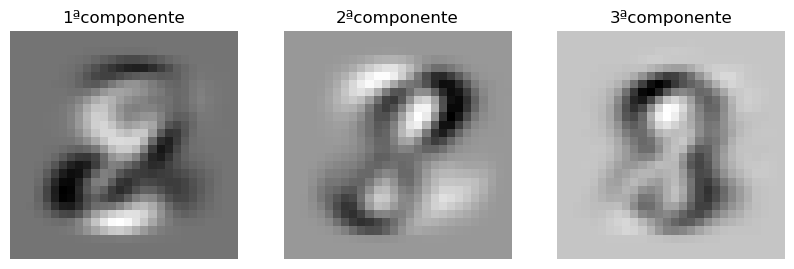

In [4]:
W = V[:, :comp]

W1 = W[:, 0].reshape(28,28)
W2 = W[:, 1].reshape(28,28)
W3 = W[:, 2].reshape(28,28)


plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(W1, cmap='binary')
plt.axis('off')
plt.title('1ªcomponente')

plt.subplot(132)
plt.imshow(W2, cmap='binary')
plt.axis('off')
plt.title('2ªcomponente')

plt.subplot(133)
plt.imshow(W3, cmap='binary')
plt.axis('off')
plt.title('3ªcomponente')


## c) Aplique a transformação PCA aos dígitos  do conjunto de teste e faça a transformação inversa. Calcule o erro quadrático médio entre os dígitos de teste originais e os reconstruídos. Imprima o valor obtido.

In [5]:
X2p = np.dot(W.T, X2)
X2r = np.dot(W, X2p)

erro = np.mean((X2-X2r)**2)

print("Erro médio quadrático: %.2f"%erro)



Erro médio quadrático: 12.47


# Pergunta 2: Considere os dígitos "1", "4" e "7" dos dados (3000 dígitos de treino e 1500 dígitos de teste).
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $90\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 


In [6]:
X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

X1 = X1[:, (y1==1) | (y1==4) |(y1==7)]
y1 = y1[(y1==1) | (y1==4) |(y1==7)]

X2 = X2[:, (y2==1) | (y2==4) |(y2==7)]
y2 = y2[(y2==1) | (y2==4) |(y2==7)]


pca = PCA(n_components=0.9).fit(X1.T)
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)

print(X2p.shape)



(1500, 67)


## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.

In [7]:
svc.fit(X1p, y1)
y2e = svc.predict(X2p)

print('Matriz de confusão:')
print(confusion_matrix(y2,y2e))
print('Número total de erros no conjunto de teste: %d'%np.sum(y2!=y2e))

Matriz de confusão:
[[497   0   3]
 [  0 500   0]
 [ 13   7 480]]
Número total de erros no conjunto de teste: 23


## c) Pretende-se aplicar a transformação LDA aos dados processados com PCA. Estime a transformação LDA com os dados de treino e aplique a transformação aos dados de treino e teste. Faça um "plot"  dos dados de teste por classe no mesmo gráfico.


(1500, 2)


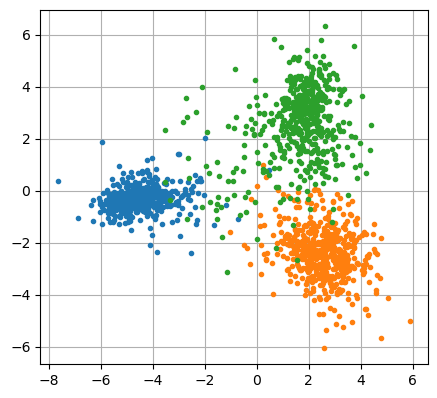

In [8]:
lda = LDA().fit(X1p, y1)
X1l = lda.transform(X1p)
X2l = lda.transform(X2p)

print(X2l.shape)


plt.figure(figsize=(5,5))
plt.plot(X2l[y2==1, 0], X2l[y2==1, 1], '.')
plt.plot(X2l[y2==4, 0], X2l[y2==4, 1], '.')
plt.plot(X2l[y2==7, 0], X2l[y2==7, 1], '.')
plt.axis('scaled')
plt.grid(True)

## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [9]:
svc.fit(X1l, y1)
y2e = svc.predict(X2l)

print('Matriz de confusão:')
print(confusion_matrix(y2,y2e))
print('Número total de erros no conjunto de teste: %d'%np.sum(y2!=y2e))

Matriz de confusão:
[[497   1   2]
 [  0 492   8]
 [ 17  18 465]]
Número total de erros no conjunto de teste: 46


# Pergunta 100 - Conjunto de dados $\texttt{MNISTsmall.p}$:
## 1. Com os dados de treino calcule a matriz de PCA. Use o número mínimo de componentes principais de modo aos dados projetados terem 75% da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 


In [10]:
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

# Dados de treino
X1 = X[:, f1]
y1 = y[f1]

# Dados de teste
X2 = X[:, f2]
y2 = y[f2]

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])


In [19]:
Cx = np.cov(X1)
u, V = la.eig(Cx)
u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u/np.sum(u)
ucum = np.cumsum(un)

comp = np.sum(ucum <= 0.75)

print("Nro Componentes Principais: ", comp)
print('Percentagem da variância total dos dados:', ucum[32])


Nro Componentes Principais:  32
Percentagem da variância total dos dados: 0.7529636562502182


## 2. Transforme os conjuntos de treino e teste com a transformação da alínea anterior.


In [21]:
W = V[:, :comp]

X1p = np.dot(W.T, X1)
X2p = np.dot(W.T, X2)

## 3. Para os dados transformados aplique a transformação LDA usando a função $\texttt{LinearDiscriminantAnalysis}$ do $\texttt{sklearn}$.


In [31]:
lda = LDA().fit(X1p.T, y1)
X1l = lda.transform(X1p.T).T
X2l = lda.transform(X2p.T).T

print(X1l.shape, X2l.shape)

(9, 10000) (9, 5000)


## 4.  Use o classificador da alínea anterior e calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.

In [34]:
y1e = lda.predict(X1p.T)
y2e = lda.predict(X2p.T)

print('Treino:')
print('Nº de erros:',np.sum(y1!=y1e))
print(confusion_matrix(y1,y1e))

print('Teste:')
print('Nº de erros:',np.sum(y2!=y2e))
print(confusion_matrix(y2,y2e))


Treino:
Nº de erros: 1423
[[914   0   6   7   2  35  20   2  10   4]
 [  0 965   3   0   1   9   0   2  17   3]
 [  9  57 801  23  20   8  19  13  36  14]
 [  0  25  31 816   1  53   9  21  17  27]
 [  0  10   7   0 847   4  12   1  10 109]
 [ 15  10   4  54  12 831  19   3  39  13]
 [ 10  19   8   1  13  31 913   0   5   0]
 [  4  33   7   5  31   2   0 860   3  55]
 [  9  50  12  43  11  59  12   4 771  29]
 [  9  10   5  10  47  11   2  37  10 859]]
Teste:
Nº de erros: 899
[[458   0   1   1   1  19  17   0   3   0]
 [  0 483   2   3   1   3   2   1   5   0]
 [  4  46 368  18   7   3   7  15  29   3]
 [  2   5   7 402   2  44   5  14  12   7]
 [  1   4   3   0 395   3   9   1   5  79]
 [ 10   4   0  29  11 396  13   8  16  13]
 [ 11  10   3   0  15  28 427   1   3   2]
 [  1  40  13   2  13   1   0 394   5  31]
 [  6  29   4  27  10  36   5  10 360  13]
 [  4  11   3   9  26  10   2  14   3 418]]
